# Day 1

## Step 1: Importing the libraries

In [3]:
import numpy as np
import pandas as pd

## Step 2: Importing dataset

In [6]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [8]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,3].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Step 3: Handling the missing data

In [12]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Step 4: Encoding categorical data

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencode_X = LabelEncoder() 
X[:,0] = labelencode_X.fit_transform(X[:,0])
X[:,0]

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0], dtype=object)

### Creating a dummy variable

In [22]:
#categorical_features是需要编码的列索引
onehotencoder = OneHotEncoder(categorical_features= [0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
X

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.40000000e+01, 7.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 2.70000000e+01, 4.80000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 3.00000000e+01, 5.40000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 3.80000000e+01, 6.10000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 4.00000000e+01, 6.37777778e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.50000000e+01, 5.80000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 3.87777778e+01, 5.

## Step 5: Splitting the datasets into training sets and Test sets

In [26]:
#test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量,random_state：是随机数的种子
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

## Step 6: Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
X_train

array([[ 1.        , -1.        ,  1.        , -1.        ,  2.64575131,
        -0.77459667,  0.26306757,  0.12381479],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667, -0.25350148,  0.46175632],
       [ 1.        , -1.        ,  1.        , -1.        , -0.37796447,
         1.29099445, -1.97539832, -1.53093341],
       [ 1.        , -1.        ,  1.        , -1.        , -0.37796447,
         1.29099445,  0.05261351, -1.11141978],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667,  1.64058505,  1.7202972 ],
       [ 1.        , -1.        ,  1.        , -1.        , -0.37796447,
         1.29099445, -0.0813118 , -0.16751412],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667,  0.95182631,  0.98614835],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667, -0.59788085, -0.48214934]])

# Day 2 简单线性回归

##  Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/studentscores.csv')
X = dataset.iloc[:,:1].values
Y = dataset.iloc[:,1].values

from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/4,random_state = 0)
X_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

## Step 2: Fitting Simple Linear Regression Model to the training set

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train,Y_train)

## Step 3: Predecting the Result

In [5]:
Y_pred = regressor.predict(X_test)

## Step 4: Visualization

### Visualising the Training results

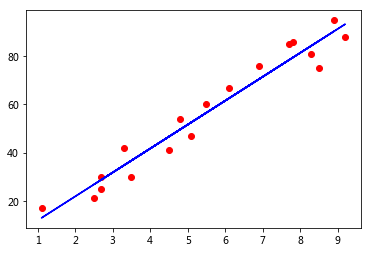

In [6]:
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'b')

### Visualizing the test results

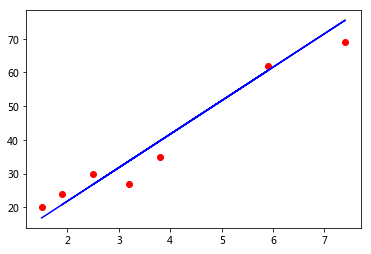

In [7]:
plt.scatter(X_test,Y_test,color = 'r')
plt.plot(X_test,Y_pred,color = 'b')

## Mathematical principle supplement

### 最小二乘法

　　回归分析中，如果只包括一个自变量和一个因变量，且二者的关系可用一条直线近似表示，这种回归分析称为一元线性回归分析。如果回归分析中包括两个或两个以上的自变量，且因变量和自变量之间是线性关系，则称为多元线性回归分析。对于二维空间线性是一条直线；对于三维空间线性是一个平面，对于多维空间线性是一个超平面。

　　对于一元线性回归模型, 假设从总体中获取了n组观察值（X1，Y1），（X2，Y2）， …，（Xn，Yn）。对于平面中的这n个点，可以使用无数条曲线来拟合。要求样本回归函数尽可能好地拟合这组值。综合起来看，这条直线处于样本数据的中心位置最合理。 选择最佳拟合曲线的标准可以确定为：使总的拟合误差（即总残差）达到最小。

　　最常用的是普通最小二乘法（ Ordinary Least Square，OLS）：所选择的回归模型应该使所有观察值的残差平方和达到最小。（Q为残差平方和）- 即采用平方损失函数。

为建立这直线方程就要确定a0和a1，应用《最小二乘法原理》，将实测值Yi与利用计算值Yj（Yj=B0+B1Xi）的差的平方和最小作为优化依据

样本模型:
    <img src="image/Linear.jpg" />

损失平方函数:
    <img src="image/loss.jpg" />    

要求得损失函数最小，则分别对B0和B1求偏导，另其等于0,从而得到:
    <img src="image/res.jpg" /> 

从而求得平方损失函数的极值点。

# Day 3 [多元线性回归](http://www.statisticssolutions.com/assumptions-of-linear-regression/)

## Step 1: Data Preprocessing

### Importing the libraries

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

### Importing the dataset

In [86]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

### Encoding Categorical data

In [87]:
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder(categorical_features=[3])
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X = onehotencoder.fit_transform(X).toarray()

### Avoiding Dummy Variable Trap

In [88]:
X = X[: , 1:]

### Splitting the dataset into the Training set and Test set

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

## Step 2: Fitting Multiple Linear Regression to the Training set

In [90]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step 3: Predicting the Test set results

In [91]:
# y_pred = regressor.predict(X_test)
regressor.score(X_test,Y_test)

0.9347068473282446

## Mathematical principle supplement

#### 线性回归三大假设：
1. 样本是从母体随机抽取出来的
2. 因变量Y在直线上是连续的
3. 残差项是独立且相同分布的，且服从正态分布

#### [线性回归对数据的要求:](http://www.statisticssolutions.com/assumptions-of-linear-regression/)
1. 线性回归对异常值很敏感，需要去掉异常值
2. 要求变量是多元正太分布，可以使用拟合优度检查来检验正态性(seaborn.distplot,scipy.stats.probplot)，使用box-cox公式使得数据更好的分布(scipy.special.boxcox1p),当数据不是正太分布时，使用非线性模型
3. 独立变量之间相关性不可以过高，会出现dummy variable trap，出现多重共线性
4. 数据很少或没有自相关，即y(x+1)和y(x)没有相关性

### [Linear Model supplement](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)

1. Ridge Regression:<br>
    使用L2正则，可以缩小参数范围，从而防止多重共线性的问题(自变量相关),通过系数收缩降低了模型的复杂性
<img src='image/RIDGE.png'>
2. LASSO Regression :<br>
    LASSO 使用L1正则技术，在拥有很多特征的情况下，它会进行特征选择(将系数减小到0)
<img src='image/LASSO.png'>
3. Elastic Net Regression：<br>
    Elastic 是L1和L2的组合,适合使用于大数据集的情况.<br>
    可以通过调整参数来实现Ridge和Lasso,我们需要在定义模型时定义alpha和l1_ratio,分别控制L1和L2惩罚，相应的方程为：<br>
                                Alpha = a + b和l1_ratio = a /（a + b）<br>
    当我们改变alpha和l1_ratio的值时，a和b被相应地设置，以便它们控制L1和L2之间的权衡：<br>
                                        a *（L1项）+ b *（L2项）<br>
    设alpha（或a + b）= 1，现在考虑以下情况：<br>
    如果l1_ratio = 1，那么如果我们看一下l1_ratio的公式，我们可以看到，如果a = 1，l1_ratio只能等于1，这意味着b = 0。因此，这将是一个LASSO。<br>
    同样，如果l1_ratio = 0，则表示a = 0。是一个Bridge。 <br>
    对于0到1之间的l1_ratio，是LASSO和Ridge的结合。<br>
<img src='image/Elastic .png'>

# [Day 4 逻辑回归](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

## 什么是逻辑回归

#### 逻辑回归用来处理不同的分类问题，它的目的是预测当前的对象属于哪个组，它会给出一个离散的二进制数出的结果。


## 如何工作

#### 逻辑回归使用基础逻辑函数通过估算概率来测量因变量(我们想要预测的标签)和一个或者多个自变量之间的关系。

## Sigmoid函数

#### Sigmoid函数是一个S形曲线，可以实现将任意真实值映射为值域为0-1的值，但从来不局限于这些值。

<img src="image/sigmoid.png" />

## 做出预测

#### 这些概率值必须转换为二进制数，以便实际中进行预测。这是逻辑函数的任务，也被称为sigmoid函数。然后使用阈值分类器将(0,1)范围的值转化为0和1的值来表示结果

## 逻辑回归 VS 线性回归

#### 逻辑回归给出离散的输出结果，然后线性回归给出连续的输出结果。

# Day 5 

# Day 6 逻辑回归的实现

## The DataSet | Social Network

<img src='image/data.PNG'>

此数据集包含社交网络中用户的信息。这些信息是用户ID，性别，年龄和估计工资。一家汽车公司刚刚推出了他们全新的豪华SUV。我们试图看看社交网络中的哪些用户将购买这款全新的SUV。这里的最后一栏是或否用户购买了这款SUV，我们将构建一个预测模型如果用户打算根据两个变量来购买SUV，这两个变量将是年龄和估计的工资。所以我们的特征矩阵只是这两列。我们希望找到年龄与用户的估计工资之间的一些相关性以及他购买是或否购买SUV的决定。

## Step 1 | Data Pre-Processing

### Importing the Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Importing the dataset

In [30]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:,-1].values

### Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [32]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(X_train.astype(float))
# x_test = sc.fit_transform(X_test.astype(float))

## Step 2 | Logistic Regression Model

这个工作的库被称为线性模型的库，是因为逻辑回归是一个线性分类器，在这里我拥有两个纬度，所以我们的两类用户被一条直线分开。

### Fitting Logistic Regression to the Training set

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Step 3 | Predection

### Predicting the Test set results

In [34]:
y_pred = classifier.predict(x_test)

## Step 4 | Evaluating The Predection

我们预测了测试结果，现在我们将评估我们的逻辑回归模型是否正确学习和理解。所以这个混淆矩阵将包含我们的模型在集合上做出的正确预测以及不正确的预测。

### Making the Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

### Visualization

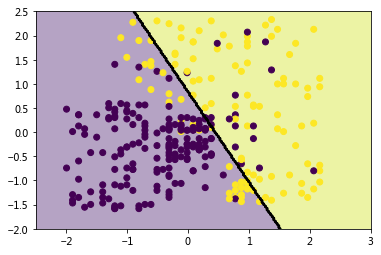

In [36]:
X,Y = np.mgrid[-2.5:3:200j,-2:2.5:200j]
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

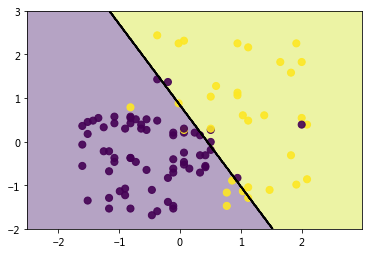

In [37]:
X, Y = np.meshgrid(np.arange(-2.5,3,0.01),np.arange(-2,3,0.01))
# X,Y = np.mgrid[-2.5:3:200j,-2:3:200j]
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=50,alpha=0.9)

# Day 7

## 什么是K-NN

K近邻算法是一种简单也是最常用的分类算法，它也可以应用于回归计算。
K-NN是无参数学习(它不会对底层数据的分布做出任何假设)，它是基于实例(意味着它不是显示的训练模型)并在有监督的学习环境中使用。

## 做出预测

若要对未标记的对象进行分类，则会计算出该对象对标记的对象之间的距离，确定其k近邻点，然后使用周边数量最多的最近邻点的类标签来确定该对象的类标签，对于实际中的输入的变量，最常用的距离变量是欧式距离。

## k的取值

k的取值并不容易，k值小意味这噪声会对结果产生较大的影响，而k值大则会使计算成本变高。这很大程度上取决于你的实际情况，有些情况下最好是遍历每个可能的k值，然后根据实际来选择k值。

## K-NN算法是怎样工作的

K-NN用于分类时，输出是一个类别。
这种方法有三个关键元素:一组标记的对象，例如:一组已存储的记录，对象之间的距离以及k的值(最近邻的数量)

## 距离度量

欧式距离是一个新点和一个现有点在所有属性上的差的平方之和的平方根。
其他常见的距离度量方法包括:
    Hamming Distance
    汉明距离
    Manhattan Distance
    曼哈顿距离
    Minkowski Distance
    闵氏距离

# Day8　了解逻辑回归背后的数学原理

了解逻辑回归一般解决yes or no 的问题，从[博客](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)学习并熟悉其数学原理，并手动推倒公式加深理解

# Day９　支持向量机

了解什么是支持向量机:通过其内核机制将数据投射到高维空间，使用超平面进行分类。<br>

超平面:能够将某个值最大化的平面，这个值为超平面离所有训练样本的最小距离<br>

间隔(margin)：这个最小距离为间隔<br>

核函数(kernel)：将数据从低维向高维映射，并且可以直接在原来的低维空间中进行计算，而不需要显式地写出映射后的结果<br>

高斯核函数能够上升到无限维，ｎ个２维点可以上升到ｎ维，通过计算||x-xi|| i=1,2,3....n<br>

正则化(regularization)：防止过拟合的情况发生，加上约束条件，将影响训练结果的维度的系数权重减小，甚至减小到0<br>

系数(gamma):系数定义了单个训练集合的影响程度，系数小的值，距离远的点也会用于计算，而系数大的值更多的使用距离近的点

# Day10 SVM和KNN

熟悉SVM和knn算法的知识

# Day11 knn的算法的实现

## The DataSet | Social Network

<img src='image/data.PNG'>

### Importing the libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [26]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

/home/jakey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting K-NN to the Training set

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Predicting the Test set results

In [32]:
y_pred = knn.predict(x_test)

### Making the Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pred)

In [34]:
cn

array([[59,  9],
       [ 8, 24]])

# Day12 Support Vector Machine

参考了[博客](https://blog.csdn.net/v_july_v/article/details/7624837),熟悉SVM的第一层和第二层境界，了解了第三层的公式推倒部分

# Day13 支持向量机的实现

## The DataSet | Social Network
<img src='image/data.PNG'>

### Importing the libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [44]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

/home/jakey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting SVC to the Training set

In [73]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0, C=1)
classifier.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the Test set results

In [74]:
y_pred = classifier.predict(x_test)

### Make the confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

### Visualization

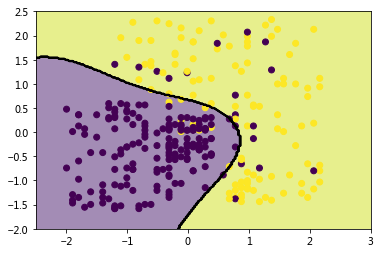

In [76]:
X,Y = np.mgrid[-2.5:3:200j,-2:2.5:200j]
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X, Y, Z, alpha=0.5)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
p3 = plt.scatter(x_train[:, 0] ,x_train[:, 1], c=y_train)

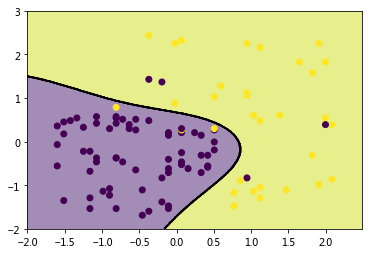

In [77]:
X ,Y = np.meshgrid(np.arange(-2, 2.5, 0.01), np.arange(-2, 3, 0.01))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X, Y, Z, alpha=0.5)
plt.contour(X, Y, Z, colors=['k'], linestyles=['-'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)